# Fase (1): Importação do conjunto de dados pelo "sklearn.datasets"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
X = pd.DataFrame(data=load_breast_cancer().data, columns=load_breast_cancer().feature_names)
y = pd.Series(data=load_breast_cancer().target, name='class')

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
y.value_counts()

class
1    357
0    212
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)

In [8]:
y_train.shape, y_test.shape

((398,), (171,))

# Fase (2): Aplicação dos métodos wrapper para a seleção de atributos

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Treinamento com todos os atributos (referência ou baseline)

rf = RandomForestClassifier(n_estimators=50, random_state=10)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=10)

### Recursive Feature Elimination (RFE)

In [11]:
from sklearn.feature_selection import RFE

In [12]:
# Vamos reduzir para até 10 variáveis

rfe = RFE(estimator=rf,
         n_features_to_select=10,
         step=1)

In [13]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=10),
    n_features_to_select=10)

In [14]:
rfe.support_

array([ True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False])

In [15]:
rfe.get_feature_names_out()

array(['mean radius', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concave points'],
      dtype=object)

In [16]:
rfe.get_feature_names_out().shape

(10,)

In [17]:
rfe_cols = rfe.get_feature_names_out()

In [18]:
# Novos dados com as variáveis selecionadas

X_train_rfe = X_train[rfe_cols].copy()
X_train_rfe.head()

,mean radius,mean concavity,mean concave points,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concave points
469,11.62,0.10200,0.05564,13.36,25.40,88.14,528.1,0.17800,0.28780,0.14160
561,11.20,0.00000,0.00000,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000
443,10.57,0.01993,0.01111,10.94,23.31,69.35,366.3,0.09794,0.06542,0.02222
362,12.76,0.02688,0.01781,13.75,25.99,87.82,579.7,0.12980,0.18390,0.08312
271,11.29,0.03265,0.02755,12.32,16.18,78.27,457.5,0.13580,0.15070,0.08750


In [19]:
X_test_rfe = X_test[rfe_cols].copy()
X_test_rfe.head()

,mean radius,mean concavity,mean concave points,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concave points
14,13.73,0.21280,0.08025,15.03,32.01,108.80,697.7,0.1651,0.77250,0.22080
150,13.00,0.03136,0.02645,14.16,24.11,90.82,616.7,0.1297,0.11050,0.06296
275,11.89,0.05929,0.07404,12.40,18.99,79.46,472.4,0.1359,0.08368,0.08946
83,19.10,0.19370,0.14690,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.18410
86,14.48,0.12040,0.04938,16.21,29.25,108.40,808.9,0.1306,0.19760,0.12250


### Sequential feature selector (SFS)

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

In [21]:
# Vamos selecionar sequencialmente 7 variáveis (direction='forward')

sfs = SequentialFeatureSelector(estimator=rf,
                               n_features_to_select=7,
                               direction='forward',
                               n_jobs=-1)

In [22]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=50,
                                                           random_state=10),
                          n_features_to_select=7, n_jobs=-1)

In [23]:
sfs.get_feature_names_out()

array(['mean texture', 'smoothness error', 'concavity error',
       'worst radius', 'worst perimeter', 'worst smoothness',
       'worst compactness'], dtype=object)

In [24]:
sfs_cols = sfs.get_feature_names_out()

In [25]:
# Novos dados com as variáveis selecionadas

X_train_sfs = X_train[sfs_cols].copy()
X_train_sfs.head()

,mean texture,smoothness error,concavity error,worst radius,worst perimeter,worst smoothness,worst compactness
469,18.18,0.014590,0.04961,13.36,88.14,0.17800,0.28780
561,29.37,0.007594,0.00000,11.92,75.19,0.09267,0.05494
443,18.32,0.010720,0.01993,10.94,69.35,0.09794,0.06542
362,18.84,0.005608,0.01529,13.75,87.82,0.12980,0.18390
271,13.04,0.006472,0.01282,12.32,78.27,0.13580,0.15070


In [26]:
X_test_sfs = X_test[sfs_cols].copy()
X_test_sfs.head()

,mean texture,smoothness error,concavity error,worst radius,worst perimeter,worst smoothness,worst compactness
14,22.61,0.006429,0.05501,15.03,108.80,0.1651,0.77250
150,20.78,0.007017,0.01949,14.16,90.82,0.1297,0.11050
275,17.36,0.014180,0.01267,12.40,79.46,0.1359,0.08368
83,26.29,0.007545,0.02134,20.33,141.30,0.1392,0.28170
86,21.46,0.009369,0.05371,16.21,108.40,0.1306,0.19760


### Vamos analisar o desempenho dos modelos

In [27]:
# Original

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.935672514619883

In [28]:
# RFE

rf.fit(X_train_rfe, y_train)
rf.score(X_test_rfe, y_test)

0.9473684210526315

In [29]:
# SFS

rf.fit(X_train_sfs, y_train)
rf.score(X_test_sfs, y_test)

0.9473684210526315

# Fase (3): Aplicação do método de projeção utilizando PCA

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
443,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.12550,0.08312,0.2744,0.07238
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022


In [32]:
# Padronizando os dados
scaler = StandardScaler()
scaler.fit(X_train)

X_train_pad = scaler.transform(X_train)
X_test_pad = scaler.transform(X_test)

In [33]:
X_train_pad.mean().round(), X_train_pad.std()

(np.float64(-0.0), np.float64(1.0))

In [34]:
X_train_pad[0]

array([-0.70982078, -0.258417  , -0.63739619, -0.71199581,  1.62843044,
        0.84728866,  0.16650073,  0.19641954,  0.54271642,  1.3471506 ,
        0.07888449,  1.00097591,  0.14862676, -0.30247042,  2.51058541,
        0.35861242,  0.52155906,  1.08389476, -0.29885498,  0.48535309,
       -0.60006823, -0.06586747, -0.56566159, -0.62261349,  2.01922243,
        0.18620235,  0.18018746,  0.40093281, -0.41407439,  0.44522333])

### Aplicando o PCA, com n = total de colunas na base

In [35]:
pca = PCA(n_components=len(X_train.columns))

pca.fit(X_train_pad)

PCA(n_components=30)

In [36]:
pca.components_.shape

(30, 30)

In [37]:
pca.components_

array([[ 2.16807596e-01,  9.60761257e-02,  2.25343355e-01,
         2.19624406e-01,  1.39358539e-01,  2.39203815e-01,
         2.53645213e-01,  2.59087821e-01,  1.39195259e-01,
         6.76435180e-02,  2.11950377e-01,  6.34186225e-03,
         2.18153643e-01,  2.18760045e-01, -9.98283636e-03,
         1.65523334e-01,  1.47382962e-01,  1.83697092e-01,
         4.38736083e-02,  9.24561531e-02,  2.26717090e-01,
         1.00740543e-01,  2.35088899e-01,  2.23271779e-01,
         1.24594241e-01,  2.11418223e-01,  2.30361656e-01,
         2.50056545e-01,  1.33876125e-01,  1.35809382e-01],
       [-2.32247986e-01, -7.27645848e-02, -2.13420707e-01,
        -2.26519447e-01,  1.82441171e-01,  1.45454760e-01,
         7.29267880e-02, -3.25112811e-02,  1.95487628e-01,
         3.61301291e-01, -9.30034525e-02,  9.56881628e-02,
        -7.20542017e-02, -1.53285096e-01,  2.09330155e-01,
         2.35563528e-01,  2.08012532e-01,  1.33115664e-01,
         2.05695872e-01,  2.79409016e-01, -2.19472746e-

In [38]:
pca.explained_variance_ratio_

array([4.51562288e-01, 1.96286689e-01, 8.89789757e-02, 6.59684570e-02,
       5.54081458e-02, 3.99716230e-02, 2.07373261e-02, 1.51490209e-02,
       1.17172904e-02, 1.03779370e-02, 8.61221852e-03, 8.55717926e-03,
       7.00206536e-03, 5.03349912e-03, 2.82886150e-03, 2.44272810e-03,
       1.93527044e-03, 1.67516790e-03, 1.09630956e-03, 9.91943125e-04,
       8.56929399e-04, 7.60457774e-04, 6.29081306e-04, 4.66707273e-04,
       4.24489473e-04, 2.44274708e-04, 2.07072821e-04, 5.65054835e-05,
       1.71348496e-05, 4.35119101e-06])

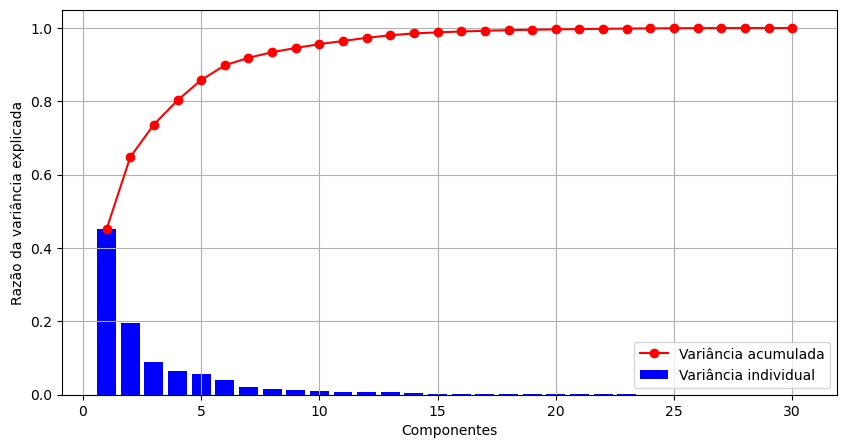

In [39]:
# Plotando em um gráfico
plt.figure(figsize=(10,5))
plt.plot([i for i in range(1, len(X_train.columns)+1)], np.cumulative_sum(pca.explained_variance_ratio_),
        '-o', label='Variância acumulada', color='Red')
plt.bar([i for i in range(1, len(X_train.columns)+1)], height=pca.explained_variance_ratio_,
       label='Variância individual', color='Blue')
plt.grid()
plt.legend()
plt.xlabel('Componentes')
plt.ylabel('Razão da variância explicada')
plt.show()

#### Parece que com 2 a 4 componentes, já temos uma variância explicada interessante.
* Vamos adotar 4 componentes, pois eles acumulados correspondem a mais de 80% da variância explicada.

In [40]:
# Agora, vamos utilizar os nossos 4 componentes para transformar o nosso conjunto de dados

pca = PCA(n_components=4)

pca.fit(X_train_pad)

# Vamos transformar os conjuntos de treino e test

X_train_pca = pca.transform(X_train_pad)
X_test_pca = pca.transform(X_test_pad)

In [41]:
X_train_pca.shape, X_test_pca.shape

((398, 4), (171, 4))

In [42]:
# Classificando o nosso conjunto de dados com redução de atributos

rf.fit(X_train_pca, y_train)
rf.score(X_test_pca, y_test)

0.9415204678362573